In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report

In [3]:
df = pd.read_csv('../data/PPMI_sncRNAcounts/counts/ML.csv')
sig_transcripts = pd.read_csv('../data/PPMI_sncRNAcounts/counts/sig_transcripts_df_v2.csv')

In [4]:
df = df[['PATNO', 'COHORT'] + sig_transcripts['transcript'].tolist()]

In [5]:
X = df.drop(['PATNO', 'COHORT'], axis=1)
y = df['COHORT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=200)

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'f1: {f1}')
print(f'confusion matrix:\n{confusion}')
print(f'classification report:\n{report}')

accuracy: 0.5924170616113744
precision: 0.5646954620321154
f1: 0.5613352197986313
confusion matrix:
[[87  8 18]
 [35  5  0]
 [24  1 33]]
classification report:
              precision    recall  f1-score   support

         1.0       0.60      0.77      0.67       113
         2.0       0.36      0.12      0.19        40
         4.0       0.65      0.57      0.61        58

    accuracy                           0.59       211
   macro avg       0.53      0.49      0.49       211
weighted avg       0.56      0.59      0.56       211



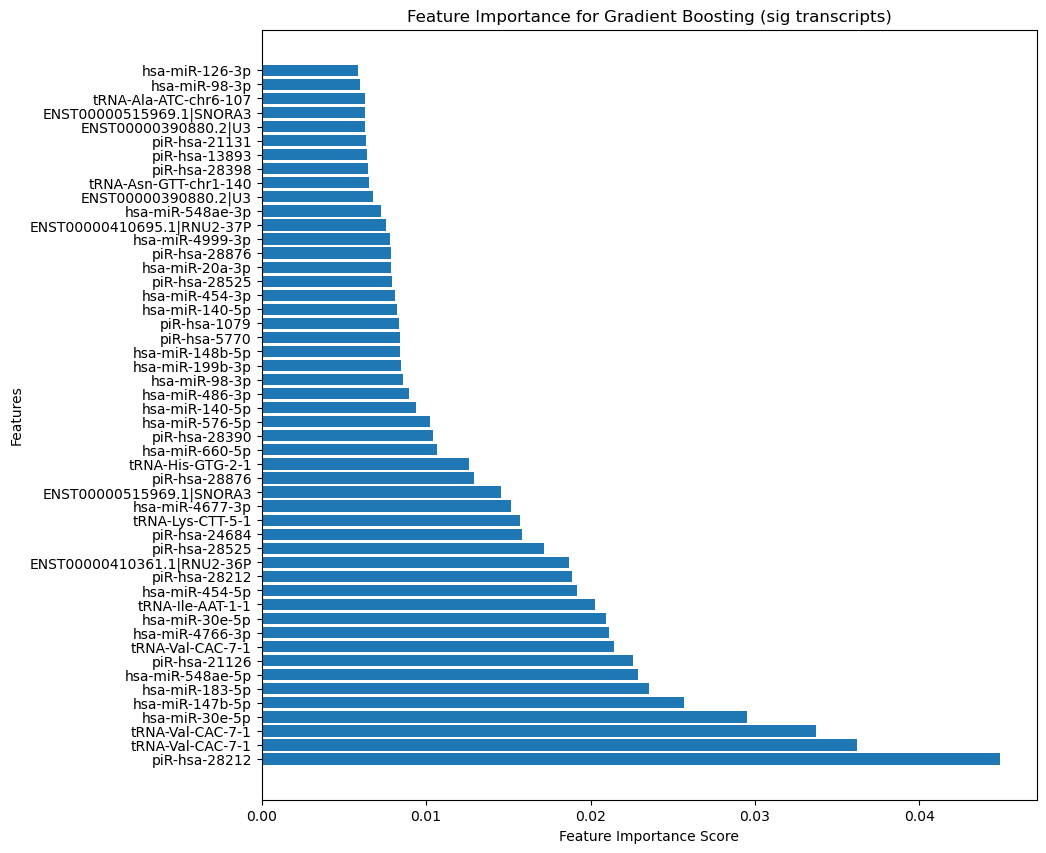

In [10]:
feature_scores = model.feature_importances_
top_idx = np.argsort(feature_scores)[::-1][:50]
top_feature_names = X.columns[top_idx]
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(range(len(top_idx)), feature_scores[top_idx], align='center')
ax.set_yticks(range(len(top_idx)), top_feature_names)
ax.set_xlabel('Feature Importance Score')
ax.set_ylabel('Features')
ax.set_title('Feature Importance for Gradient Boosting (sig transcripts)')
plt.savefig('../figures/feature_importance_gradientboost_sig_transcripts.png', dpi=300, bbox_inches='tight')
plt.show()